In [2]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [3]:
#onecall = True  # 8 days
onecall = False # 5 days

In [4]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [5]:
onecall = False

In [6]:
if onecall:
    API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
    lat, lon = get_location()
    base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
    data_for = '8 days'
    # request data
    try:
        print('Requesting json data')
        onecall_data = requests.get(url = base_url, headers = headers).json()
        #print(onecall_data)
    except:
        exit()

    # make dataframe and save
    print('Creating dataframe: ', data_for)

    df = onecall_data['daily']
    l = len(df[0])

    _8days = pd.DataFrame.from_records(df)
    print('Converting timestamp to human date')
    for k in _8days.keys()[:5]:
        #print(k)
        if k=='dt':  # date for dt
            _8days[k] = _8days[k].apply(get_date)
        else:        # time for other columns
            _8days[k] = _8days[k].apply(get_time)            
    _8days
    
    _8days.keys(), len(_8days.keys())

    print('Selecting columns')
    # select multiple column ranges
    focus = np.r_[:6, 8:14, 16:l]
    focus_idx = _8days.keys()[focus]

    status2 = pd.DataFrame(_8days[focus_idx])
    demain = status2.loc[1]

    demain
    
    focus

    # zip and save
    print('Save to CSV')
    compression_opts = dict(method='zip', archive_name='demain.csv')
    demain.to_csv('demain.zip', index=False, compression=compression_opts)
    # no compression 
    demain.to_csv('demain.csv')
    #pprint(onecall_data)
    print(_8days.iloc[0])  # today

    # plot temperature
    l = []
    for i in range(0,8):
        l.append(_8days.iloc[i].temp)

    df = pd.DataFrame(l)
    df.plot()
    plt.title('8 days forecast')
    plt.ylabel('Temp °C')
    plt.xlabel('Days')
    plt.grid()
    plt.show()

   
# 5 days forecast


In [7]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1732536000, 'main': {'temp': 12.81, 'feels_like': 12.42, 'temp_min': 11.04, 'temp_max': 12.81, 'pressure': 1004, 'sea_level': 1004, 'grnd_level': 997, 'humidity': 87, 'temp_kf': 1.77}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 3.91, 'deg': 293, 'gust': 10.11}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 8.06}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-11-25 12:00:00'}, {'dt': 1732546800, 'main': {'temp': 12.01, 'feels_like': 11.36, 'temp_min': 11.16, 'temp_max': 12.01, 'pressure': 1007, 'sea_level': 1007, 'grnd_level': 999, 'humidity': 80, 'temp_kf': 0.85}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 3.14, 'deg': 233, 'gust': 9.23}, 'visibility': 10000, 'pop': 0.99, 'rain': {'3h': 0.84}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-11-25 15:00:00'}, {

In [8]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1732536000
main          {'temp': 12.81, 'feels_like': 12.42, 'temp_min...
weather       [{'id': 501, 'main': 'Rain', 'description': 'm...
clouds                                             {'all': 100}
wind                 {'speed': 3.91, 'deg': 293, 'gust': 10.11}
visibility                                                10000
pop                                                         1.0
rain                                               {'3h': 8.06}
sys                                                {'pod': 'd'}
dt_txt                                      2024-11-25 12:00:00
Name: 0, dtype: object


In [9]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain',
       'sys', 'dt_txt'],
      dtype='object')

In [10]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   25/11 13:00  13:00     12.81     11.04
1   25/11 16:00  16:00     12.01     11.16
2   25/11 19:00  19:00     11.12     11.12
3   25/11 22:00  22:00     10.46     10.46
4   26/11 01:00  01:00      9.33      9.33
5   26/11 04:00  04:00      8.34      8.34
6   26/11 07:00  07:00      7.76      7.76
7   26/11 10:00  10:00      8.07      8.07
8   26/11 13:00  13:00     10.33     10.33
9   26/11 16:00  16:00     10.36     10.36
10  26/11 19:00  19:00      8.91      8.91
11  26/11 22:00  22:00      8.70      8.70
12  27/11 01:00  01:00      9.09      9.09
13  27/11 04:00  04:00      9.76      9.76
14  27/11 07:00  07:00     10.32     10.32
15  27/11 10:00  10:00     10.48     10.48
16  27/11 13:00  13:00     11.95     11.95
17  27/11 16:00  16:00     10.26     10.26
18  27/11 19:00  19:00      8.80      8.80
19  27/11 22:00  22:00      8.03      8.03
20  28/11 01:00  01:00      8.24      8.24
21  28/11 04:00  04:00      7.22      7.22
22  28/11 0

In [11]:
_5days['human_date']

0     25/11 13:00
1     25/11 16:00
2     25/11 19:00
3     25/11 22:00
4     26/11 01:00
5     26/11 04:00
6     26/11 07:00
7     26/11 10:00
8     26/11 13:00
9     26/11 16:00
10    26/11 19:00
11    26/11 22:00
12    27/11 01:00
13    27/11 04:00
14    27/11 07:00
15    27/11 10:00
16    27/11 13:00
17    27/11 16:00
18    27/11 19:00
19    27/11 22:00
20    28/11 01:00
21    28/11 04:00
22    28/11 07:00
23    28/11 10:00
24    28/11 13:00
25    28/11 16:00
26    28/11 19:00
27    28/11 22:00
28    29/11 01:00
29    29/11 04:00
30    29/11 07:00
31    29/11 10:00
32    29/11 13:00
33    29/11 16:00
34    29/11 19:00
35    29/11 22:00
36    30/11 01:00
37    30/11 04:00
38    30/11 07:00
39    30/11 10:00
Name: human_date, dtype: object

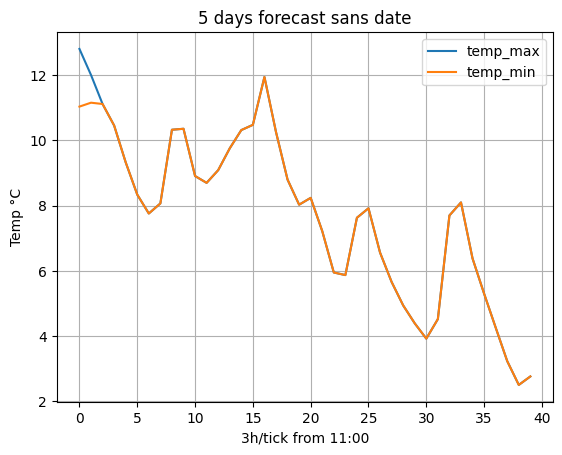

In [12]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [13]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

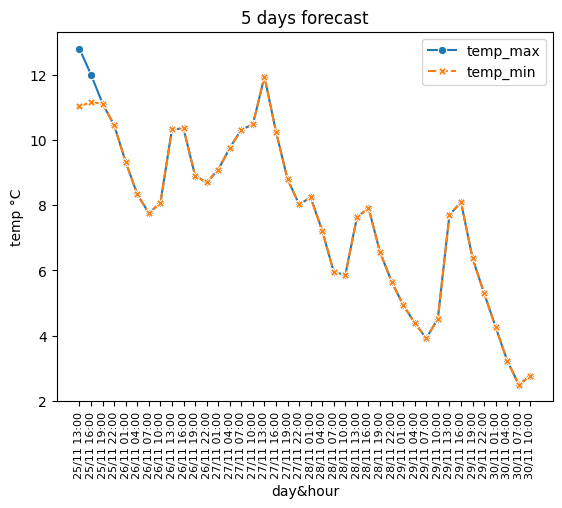

In [14]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

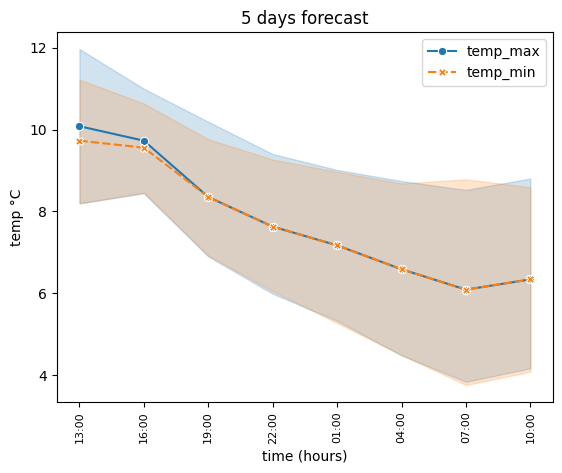

In [15]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 

In [16]:
df2

,temp_max,temp_min
time,,
13:00,12.81,11.04
16:00,12.01,11.16
19:00,11.12,11.12
22:00,10.46,10.46
01:00,9.33,9.33
04:00,8.34,8.34
07:00,7.76,7.76
10:00,8.07,8.07
13:00,10.33,10.33


In [18]:
df2_grp = df2.groupby('time')

In [30]:
for k in df2_grp:
    print(k[1]['temp_max'], type(k[1]))
    

time
01:00    9.33
01:00    9.09
01:00    8.24
01:00    4.94
01:00    4.26
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
04:00    8.34
04:00    9.76
04:00    7.22
04:00    4.39
04:00    3.23
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
07:00     7.76
07:00    10.32
07:00     5.95
07:00     3.92
07:00     2.50
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
10:00     8.07
10:00    10.48
10:00     5.87
10:00     4.52
10:00     2.76
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
13:00    12.81
13:00    10.33
13:00    11.95
13:00     7.63
13:00     7.70
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
16:00    12.01
16:00    10.36
16:00    10.26
16:00     7.92
16:00     8.10
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
19:00    11.12
19:00     8.91
19:00     8.80
19:00     6.56
19:00     6.38
Name: temp_max, dtype: float64 <clas

time
01:00    Axes(0.125,0.11;0.775x0.77)
04:00    Axes(0.125,0.11;0.775x0.77)
07:00    Axes(0.125,0.11;0.775x0.77)
10:00    Axes(0.125,0.11;0.775x0.77)
13:00    Axes(0.125,0.11;0.775x0.77)
16:00    Axes(0.125,0.11;0.775x0.77)
19:00    Axes(0.125,0.11;0.775x0.77)
22:00    Axes(0.125,0.11;0.775x0.77)
dtype: object

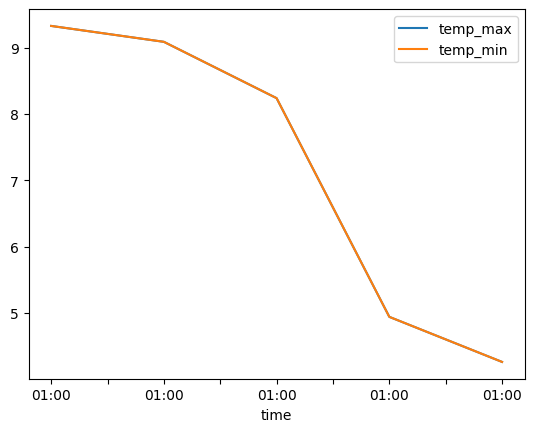

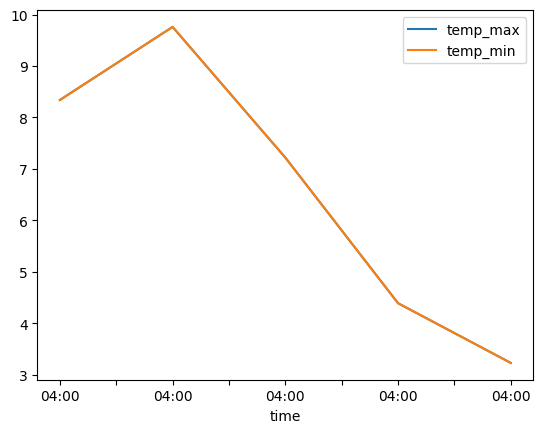

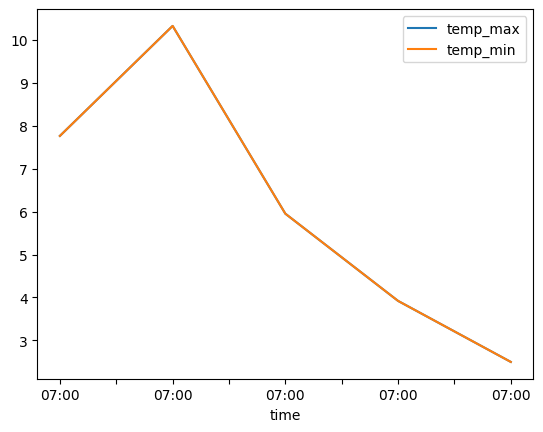

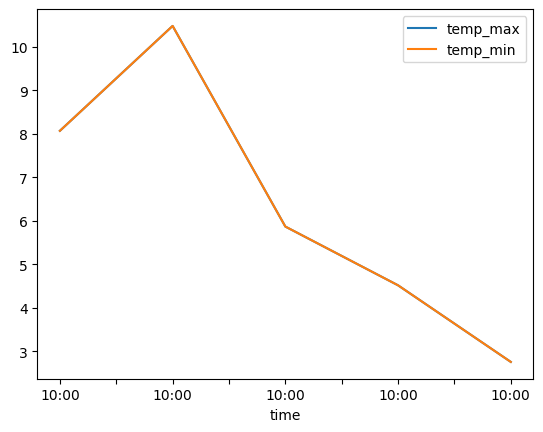

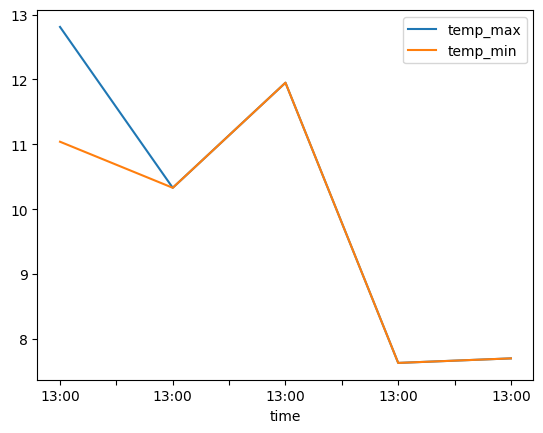

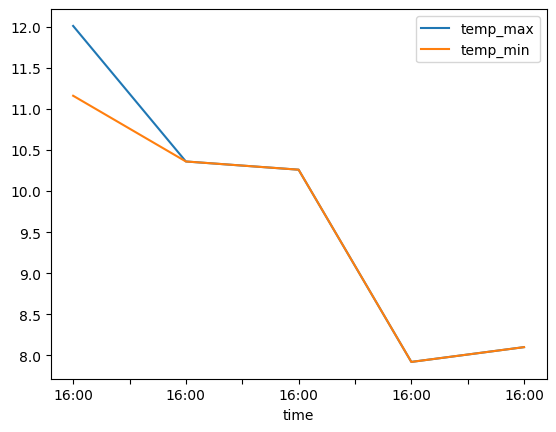

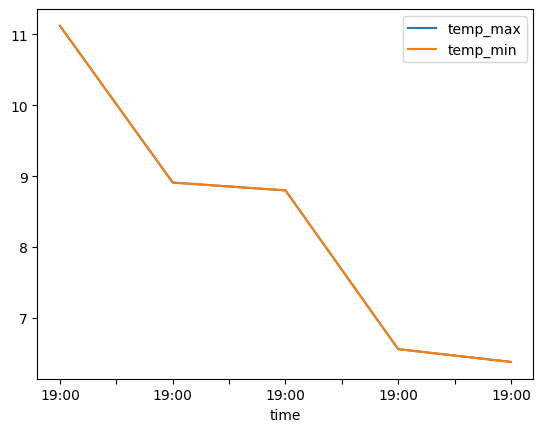

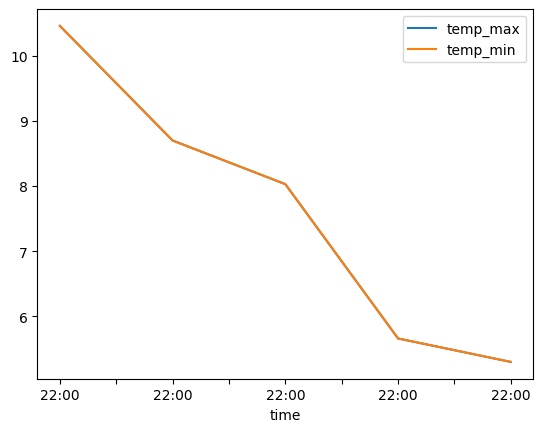

In [31]:
df2_grp.plot()